# Final Project

Welcome to the final practical project for our course on [Data Science Bootcamp](https://open.hpi.de/courses/datascience2023). Throughout this project, you will go through the entire data science process, starting from data loading and cleaning, all the way to running a model and making predictions. This hands-on project will provide you with valuable experience and allow you to apply the concepts and techniques you've learned in the course. Get ready to dive into real-world data analysis and build your skills as a data scientist!


## Important Remarks:

 - The ultimate goal of this project is to conduct comprehensive data analysis and build 2 models using the provided datasets.
 - Code is not the only thing graded here. Well-written and understandable documentation of your code is to be expected
 - Clear reasoning behind your choices in every step of the notebook is important. Be it the choice of a data cleaning technique or selecting certain features in your analysis or the choice of your 2 models.

# Importing packages


In [110]:
# Import numpy and pandas
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Load the dataset into data


In [111]:
# Loading the csv dataset in a dataframe
df = pd.read_csv('titanic.csv')
df.shape

(1000, 12)

# Dataset overview and statistical summary


In [112]:
#get overview about the dataset
#get column names, the number of non-null values in each column, and the data types of the columns
df.info()
#displays the first 10 rows of the DataFrame
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1000 non-null   int64  
 1   Survived     1000 non-null   int64  
 2   Pclass       1000 non-null   int64  
 3   Name         1000 non-null   object 
 4   Sex          1000 non-null   object 
 5   Age          823 non-null    float64
 6   SibSp        1000 non-null   int64  
 7   Parch        1000 non-null   int64  
 8   Ticket       1000 non-null   object 
 9   Fare         1000 non-null   float64
 10  Cabin        299 non-null    object 
 11  Embarked     998 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 93.9+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [113]:
#statistical summary of the numerical columns in the DataFrame. 
#which calculate various descriptive statistics, such as count, mean, standard deviation, minimum, quartiles, and maximum, for each numerical column.
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1000.000000,1000.000000,1000.000000,823.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,0.404000,2.274000,30.177606,0.716000,0.571000,56.732249
std,288.819436,0.490943,0.840018,15.138305,1.312656,1.046926,98.014902
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,250.750000,0.000000,1.000000,21.000000,0.000000,0.000000,8.050000
50%,500.500000,0.000000,3.000000,29.000000,0.000000,0.000000,17.600000
75%,750.250000,1.000000,3.000000,39.500000,1.000000,1.000000,52.000000
max,1000.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Data cleaning

In [114]:
#detect missing values 
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          701
Embarked         2
dtype: int64

In [115]:
# Handling Missing Values in Age
df['Age'].fillna(df['Age'].median(), inplace=True)
# Handling Missing Values in Embarked
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [116]:
# Drop unnecessary columns
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [117]:
#Now data is cleaned
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

# EDA

In [118]:
#Univariate Analysis
# calculate median
df["Fare"].median()

17.6

In [119]:
#display the mode which refers to the value or values that appear most frequently in a dataset.
df["Embarked"].mode()

0    S
dtype: object

<AxesSubplot:xlabel='Embarked', ylabel='Count'>

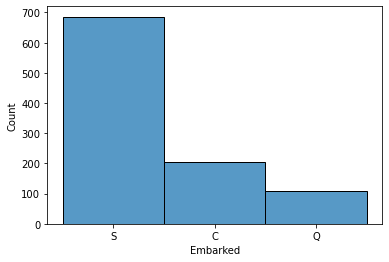

In [120]:
sns.histplot(x=df["Embarked"])

In [121]:
#The mode of colunm SibSp
df["SibSp"].mode()

0    0
dtype: int64

<AxesSubplot:xlabel='SibSp', ylabel='Count'>

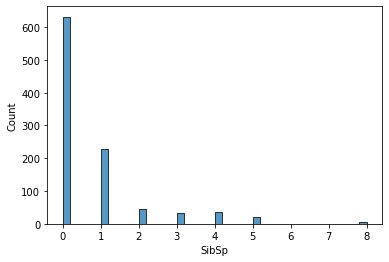

In [122]:
sns.histplot(x=df["SibSp"])

In [123]:
#disply the mean of fare
df["Fare"].mean()

56.73224929999994

In [124]:
# calculate the median of fare
df["Fare"].median()

17.6

In [125]:
# calculate the median of age
df["Age"].median()

29.0

In [126]:
#standard deviation
df["SibSp"].std()

1.3126564924103603

In [127]:
#interquantile range
print(df["Fare"].quantile(0.75)-df["Fare"].quantile(0.25))

43.95


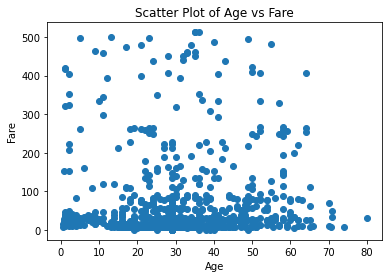

In [128]:
#Bivariate Analysis
x = df['Age']
y = df['Fare']

# Create scatter plot
plt.scatter(x, y)
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Scatter Plot of Age vs Fare')
plt.show()

In [129]:
# Correlation
# Calculate the correlation coefficient
df['Age'].corr(df['Fare'])

0.06670099943581523

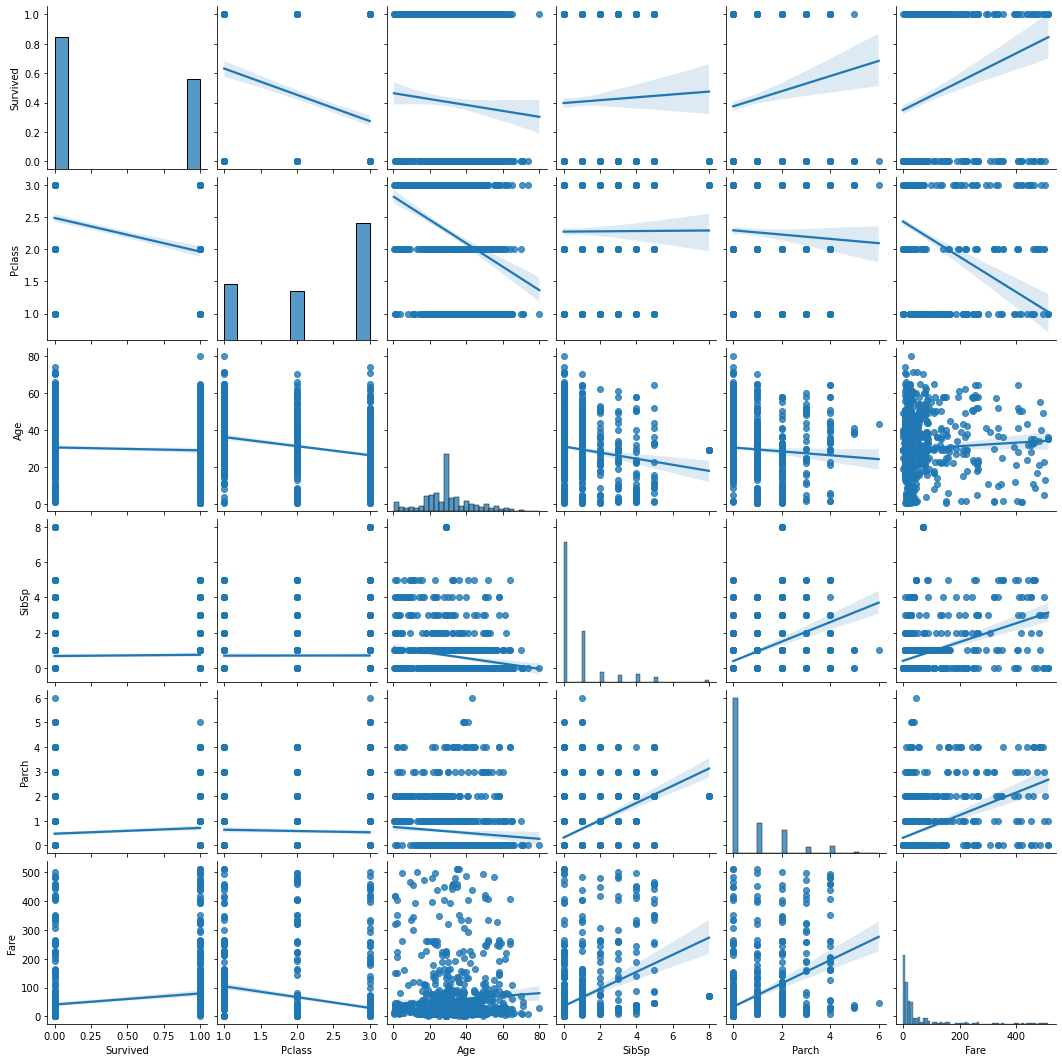

In [130]:
g = sns.pairplot(df, kind="reg")

<AxesSubplot:xlabel='Age', ylabel='Count'>

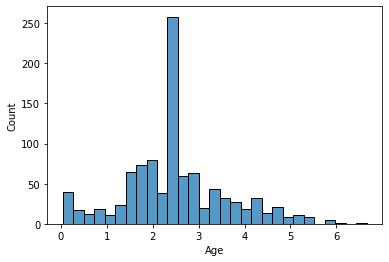

In [131]:
#multivariate analysis
x = df["Age"] / 12
sns.histplot(x)

<AxesSubplot:xlabel='Fare', ylabel='Count'>

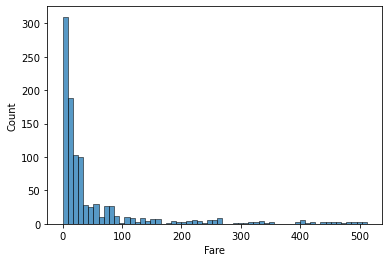

In [132]:
sns.histplot(data = df["Fare"])

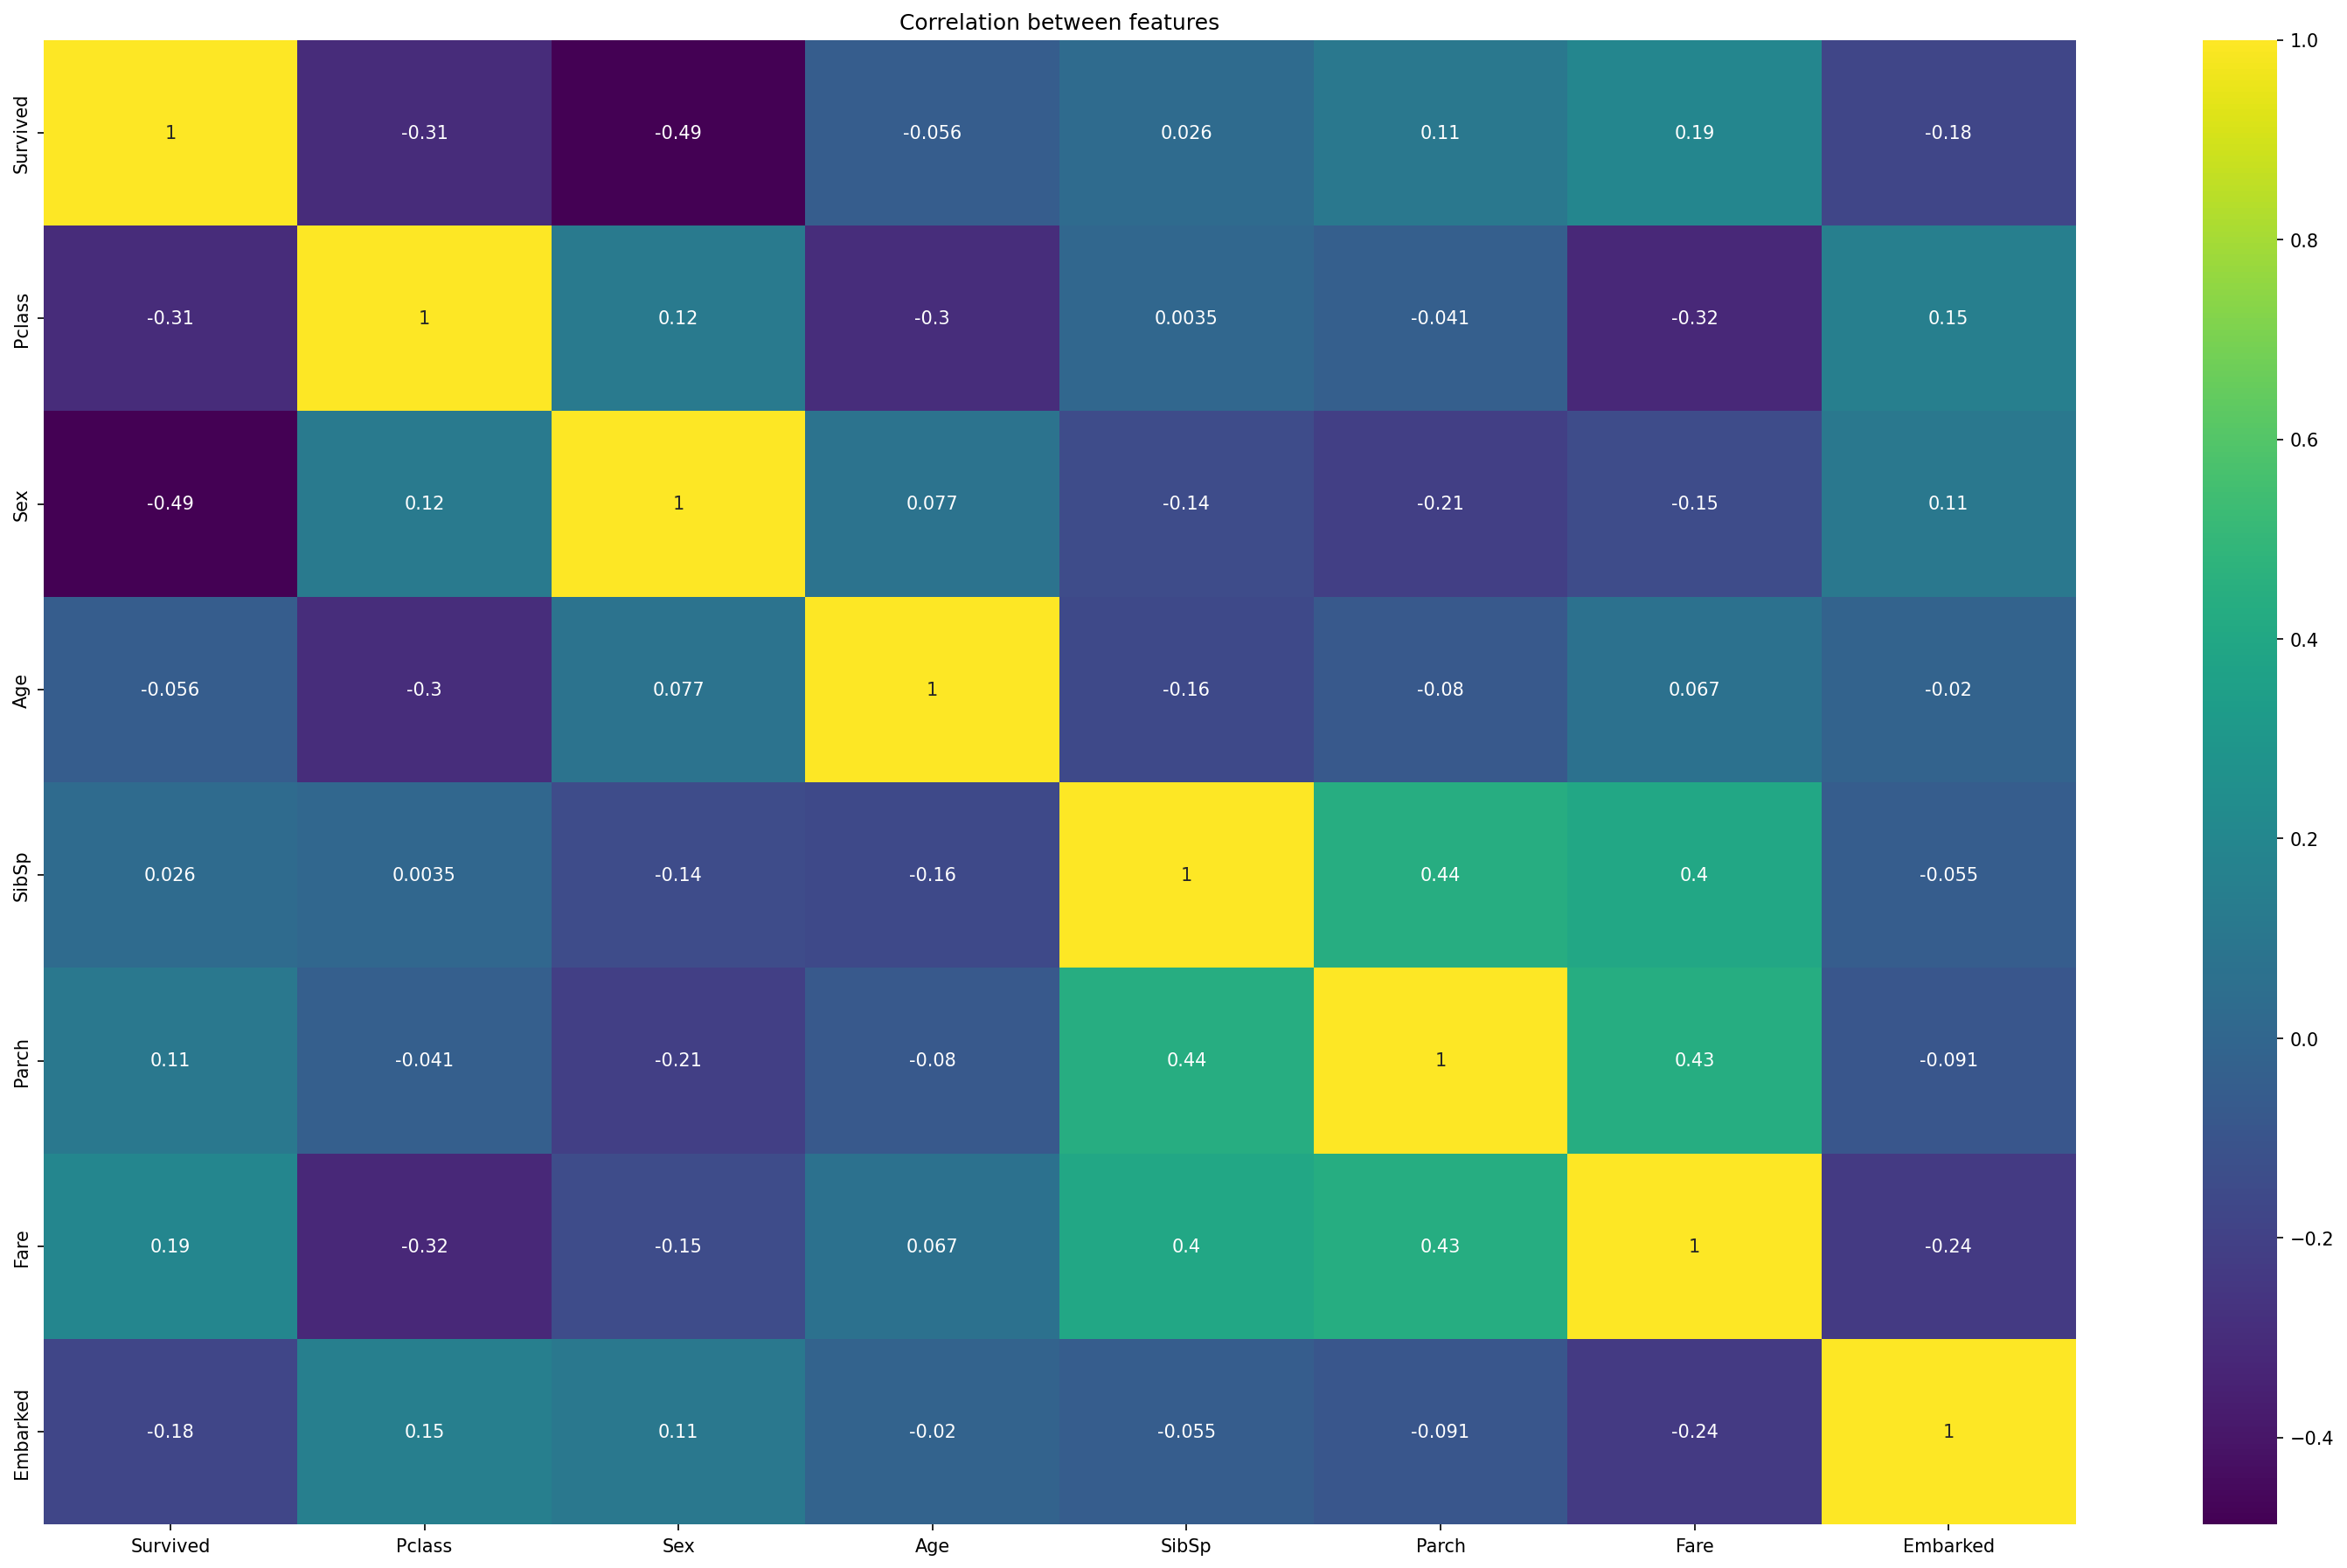

In [213]:
# Heatmap of the correlation of the features
plt.figure(figsize=(25,15),dpi=150)
sns.heatmap(df.corr(),cmap='viridis',annot=True)
plt.title('Correlation between features');

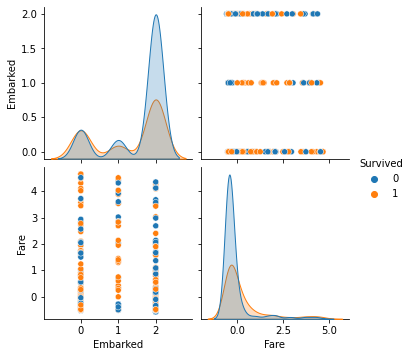

In [217]:
# understanding the relations between variables
data = df[['Embarked', 'Survived', 'Fare']]
sns.pairplot(data, hue='Survived')
plt.show()

# Data Processing and normalization

In [165]:
# Encoding Categorical Variables
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])
df['Embarked'] = label_encoder.fit_transform(df['Embarked'])

In [166]:
# Normalization using StandardScaler
scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])

In [167]:
# Splitting the Dataset
X = df.drop('Survived', axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating ML model 1

In [219]:
# Model1: Logistic regression 
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

## Prediction on Test data

In [220]:
# Predicting the Test set results
y_predict = classifier.predict(X_test)
y_pred = model.predict(X_test)

## Model 1 Performance

In [221]:
# How well did our model do in training?
accuracy_score_RegModel = round(model.score(X_train, y_train) * 100, 2)
print("Accuracy:", accuracy_score_RegModel, "percent")

Accuracy: 77.0 percent


In [222]:
#use an othe method 
from sklearn.metrics import classification_report, confusion_matrix
confusion_matrix(y_test, model.predict(X_test))

array([[96, 19],
       [25, 60]])

In [198]:
confusion_matrix_RegModel=confusion_matrix(y_test, model.predict(X_test))
print(confusion_matrix_RegModel)

[[96 19]
 [25 60]]


# Creating ML model 2

In [199]:
#ML model2: KNN
#Loading classifier libraries
from sklearn.neighbors import KNeighborsClassifier

# Set neighbors that vote on a "new" entity to 3
# No additional parameters, keeping it simple for now:
classifier = KNeighborsClassifier(n_neighbors=3)

# Fitting the model
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

## Prediction on Test data

In [200]:
# Predicting the Test set results
y_predict = classifier.predict(X_test)

## ## Model 2 Performance

In [201]:
# Check our known results (the testing proportion of the data set) against the knewly predicted results
from sklearn.metrics import accuracy_score
accuracy_KNN_model = accuracy_score(y_test, y_predict)
print("Accuracy:", accuracy_KNN_model *100)

Accuracy: 74.0


In [193]:
#use an othe method 
from sklearn.metrics import classification_report, confusion_matrix
confusion_matrix(y_test, model.predict(X_test))

array([[96, 19],
       [25, 60]])

In [202]:
confusion_matrix_KNN= confusion_matrix(y_test, model.predict(X_test))
print(confusion_matrix_KNN)

[[96 19]
 [25 60]]


# Report and insight from your analysis

We compare the accuracy scores and the confusion matrices calculated for the two models the Logistic Regression and KNN models, and we can analyze the performance of  as follows:

- Accuracy:
The accuracy score which is the classification measure  that represents a percentage of correct predictions. with Logistic Regression model we achieved an accuracy of 77.0 perecent, while using KNN model, we  achieved an accuracy of 74.0%.

- Confusion Matrix:
The confusion matrix which is a table that is used to evaluate the performance of a classification model. It summarizes the predictions made by the model on a test dataset by comparing them to the actual labels. for this dataset , Logistic Regression and KNN models have the same confusion matrix, indicating that they made similar predictions.


Based on these results, we can conclude that the Logistic Regression model performed better than the KNN model in terms of accuracy. 



In [207]:
#Accuracy of logisticregression]
print("Logistic Regression Performance:")
print("Accuracy:", accuracy_score_RegModel)
#Accuracy of KNN
print("\nK-Nearest Neighbors (KNN) Performance:")
print("Accuracy:", accuracy_KNN_model)

Logistic Regression Performance:
Accuracy: 77.0

K-Nearest Neighbors (KNN) Performance:
Accuracy: 0.74


In [210]:
# Confusion matrix for Logistic Regression
print("\nConfusion Matrix for Logistic Regression:")
print(confusion_matrix_RegModel)
# Confusion matrix for Logistic Regression
print("\nConfusion Matrix for KNN:")
print(confusion_matrix_KNN)


Confusion Matrix for Logistic Regression:
[[96 19]
 [25 60]]

Confusion Matrix for KNN:
[[96 19]
 [25 60]]


In [211]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81       115
           1       0.76      0.71      0.73        85

    accuracy                           0.78       200
   macro avg       0.78      0.77      0.77       200
weighted avg       0.78      0.78      0.78       200

